## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib notebook
np.random.seed(2)

## Gradient descent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

To draw an analogy, imagine a pit in the shape of U and you are standing at the topmost point in the pit and your objective is to reach the bottom of the pit. There is a catch, you can only take a discrete number of steps to reach the bottom. If you decide to take one step at a time you would eventually reach the bottom of the pit but this would take a longer time. If you choose to take longer steps each time, you would reach sooner but, there is a chance that you could overshoot the bottom of the pit and not exactly at the bottom.

### Example
Our optimization problem is described as below:

$$
\begin{align}
y = x^2 - 4x + 2
\end{align}
$$

In this optimization problem, our objective is a convex function.

There is an interesting property of the convex function: <b>If you find a minimum, it is a global one.</b>

Gradient descent is based on the observation that if the multi-variable function $F(x)$ is defined and differentiable in a neighborhood of a point $a$ , then $F(x)$ decreases fastest if one goes from $a$ in the direction of the negative gradient of $F$ at $a - \nabla{F(a)}$. It follows that, if

$$
\begin{align}
a_{n+1} = a_{n} - \gamma{\nabla{F(a_{n})}}
\end{align}
$$

for $\gamma$ $\epsilon$ $R_{+}$ small enough, then $F(a_{n})$ $\geq$ $F(a_{n+1})$. In other words, the term $\gamma$ $\nabla{F(a_{n})}$ is subtracted from $a$ because we want to move against the gradient, toward the minimum.

<figure>
    <img src='images\Gradient Decent.PNG' alt="Image">
    <h4 align="center">Illustration of gradient descent</h4>
</figure>

### Optimization equation as described above

In [2]:
def func_y(x):
    y = x**2 - 4*x + 2
    return y

### Gradient descent function

In [3]:
def gradient_descent(previous_x, learning_rate, epoch):
    x_gd = []
    y_gd = []
    
    x_gd.append(previous_x)
    y_gd.append(func_y(previous_x))

    # begin the loops to update x and y
    for i in range(epoch):
        current_x = previous_x - learning_rate*(2*previous_x - 4) #<- Update step
        x_gd.append(current_x)
        y_gd.append(func_y(current_x))

        # update previous_x
        previous_x = current_x

    return x_gd, y_gd

### Convex function

Text(0,0.5,'$y$')

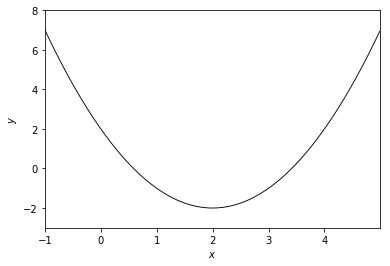

In [4]:
x0 = -0.7 #<- Initial point
learning_rate = 0.15 #<- Learning rate, play around with its value to see its effect
epoch = 10 #<- Number of iterations

# Sample data
x = np.arange(-1, 5, 0.01)
y = func_y(x)

# Plotting convex function
plt.plot(x, y, lw = 0.9, color = 'k')
plt.xlim([min(x), max(x)])
plt.ylim([-3, max(y)+1])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

### Running Gradient Decent

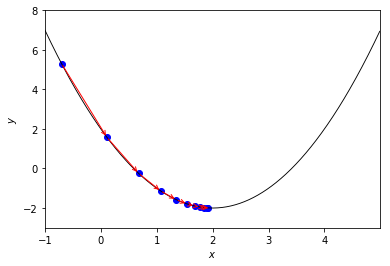

In [5]:
x_gd, y_gd = gradient_descent(x0, learning_rate, epoch) #<- Runing gradient descent

# Plotting steps
plt.plot(x, y, lw = 0.9, color = 'k')
plt.xlim([min(x), max(x)])
plt.ylim([-3, max(y)+1])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.scatter(x_gd, y_gd, c = 'b')

for i in range(1, epoch+1):
    plt.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

## Data for Linear Regression

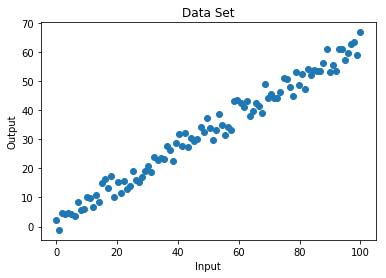

In [6]:
# Sample data for Implementation
x = np.linspace(0, 100, 100)
delta = np.random.uniform(-5, 5, x.size)
y = 0.6*x + 3 + delta

plt.scatter(x, y)
plt.title("Data Set")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Cost Function
In ML, cost functions are used to estimate how badly models are performing. 

Put simply, a cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y. 

This is typically expressed as a difference or distance between the predicted value and the actual value. The cost function (you may also see this referred to as loss or error.) can be estimated by iteratively running the model to compare estimated predictions against “ground truth” — the known values of y.

The objective of a ML model, therefore, is to find parameters, weights or a structure that minimises the cost function.

### Mean Squared Error
It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points.

$$
J = \frac{1}{n} \sum_{i=1}^n {(w^T x(i) - y(i))^2}
$$

where, 

$w^T x(i)$ : Prediction made by the model for sample i

$y(i)$ : Ground truth for sample i

$n$ : Total number of samples in the dataset or under consideration

$w$ : Weights of the model

## Linear Regression
### Regression
Regression is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out cause and effect relationship between variables.

Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable.

<figure>
    <img src='images\linearReg.PNG' alt="Image">
    <h4 align="center">Linear Regression</h4>
</figure>

The red line in the above graph is referred to as the best fit straight line. Based on the given data points, we try to plot a line that models the points the best.

The line can be modelled based on the linear equation shown below.
$$
y = w_0 + w_1 * x \\
\\
y = w_0 * 1 + w_1 * x
$$

To update $w_0$ and $w_1$, we take gradients from the cost function. To find these gradients, we take partial derivatives with respect to $w_0$ and $w_1$ or our cost function.

<b>Cost Function</b>
$$
J = \frac{1}{n} \sum_{i=1}^n {(w^T x(i) - y(i))^2} 
$$

<b>Derivatives </b>

$$
\frac{\partial J}{\partial w_0} = \frac{2}{n} \sum_{i=1}^n {(pred_i - y_i)} \\
\frac{\partial J}{\partial w_1} = \frac{2}{n} \sum_{i=1}^n {(pred_i - y_i)} . x_i \\
$$

<b>Updates will be </b>

$$
w_0 = w_0 - \alpha . \frac{2}{n} \sum_{i=1}^n {(pred_i - y_i)} \\
w_1 = w_1 - \alpha . \frac{2}{n} \sum_{i=1}^n {(pred_i - y_i)} . x_i \\
$$

The partial derivates are the gradients and they are used to update the values of $w_0$ and $w_1$. Alpha is the learning rate which is a hyperparameter that you must specify.

## Loss function and Gradient Decent function

In [7]:
#Loss Function
def MSELoss(predicted, target):
    dif = (predicted - target) ** 2
    return np.mean(dif)

#Gradient Descent
def GradientDecent(theta, x, predicted, target, learning_rate = 2e-05):
    dif = predicted - target
    difprod = np.multiply(dif, x)
    gradient = np.mean(difprod, axis = 0)
    change = gradient.reshape(-1, 1) * learning_rate
    return theta - change

## Defining input output arrays and weight matrix

In [8]:
#Converting data to arrays
x_val = np.ones(shape=(len(x), 2))
y_val = np.array(y).reshape(-1, 1)
x_val[:, 1] = np.array(x).T

weights = np.random.rand(2, 1)
print("Initial weights")
print(weights)

Initial weights
[[ 0.77800816]
 [ 0.13395421]]


## Main Loop

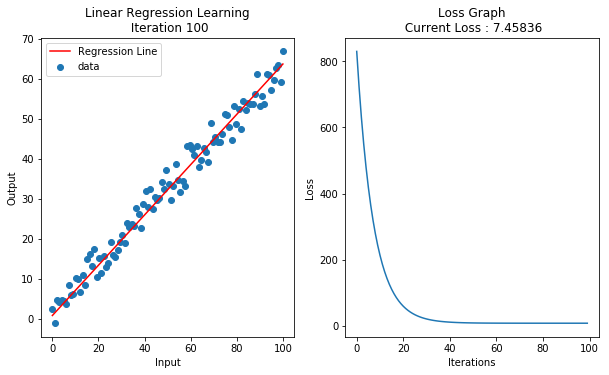

In [9]:
# Visualization code
fig = plt.gcf()
fig.set_size_inches(10, 5.5)
fig.show()
fig.canvas.draw()
fig.canvas.set_window_title('Linear Regression')

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Loss tracking
loss = []

# Main loop
for j in range(1, 101):
    pred = np.matmul(x_val, weights) #<- Prediction
    l = MSELoss(pred, y_val) #<- Loss
    loss.append(l) #<- Loss book keeping
    weights = GradientDecent(weights, x_val, pred, y_val) #<- Weights updation
    
    #Visualization updation
    ax1.clear()
    ax2.clear()

    ax1.set_title("Linear Regression Learning\n Iteration {}".format(j))
    ax1.set_xlabel("Input")
    ax1.set_ylabel("Output")

    ax2.set_title("Loss Graph\n Current Loss : {:.5f}".format(l))
    ax2.set_ylabel("Loss")
    ax2.set_xlabel("Iterations")

    ax1.scatter(x, y, label = "data")
    ax1.plot(x, pred, c = 'r', label = "Regression Line")
    ax1.legend(loc="upper left")
    ax2.plot(list(range(j)), loss)
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)

## References
1. Cost Function : https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220
2. Gradient Descent : https://en.wikipedia.org/wiki/Gradient_descent
3. Mean Squared Error : https://www.oreilly.com/library/view/machine-learning-with/9781785889936/669125cc-ce5c-4507-a28e-065ebfda8f86.xhtml
4. Linear Regression : https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a 